**Presentacion Proyecto Seguros Gonzalez
Curso 19130 - Data Science
CoderHouse**

**Alumno**: Rodrigo Gonzalez

**Profesor**: David Bustos Usta

**Tutor**: Corina Garrido

**Presentación de la empresa/Problema Especifico** 

Somos Seguros Gonzalez, una organización que ofrece productos de cobertura para siniestros vehiculares.  Actualmente estamos creciendo en nuestra flota de asegurados y generando un perfil completo de cliente para poder explotar sus datos, por eso creamos el área de Data Science.

Al tener cada vez mas nuevos clientes, queremos aprovechar los beneficios del “Machine Learning” para predecir si realizara un reclamo a nuestra empresa en base a los datos historicos. 
Como se trata de un problema de Clasificación, utilizaremos los algoritmos de este tipo para generar el modelo.
Nuestro DS proviene de nuestra organización (First Party) y es de tipo Estructural.




**Etapa de Data Acquisition** 

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import numpy as np
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline
sns.set_style('darkgrid')
data = pd.read_csv("DS.csv",sep=';',encoding='iso-8859-1')
data.dtypes

Saving DS.csv to DS.csv


ID                      int64
RANGO-EDAD             object
SEXO                   object
RACE                   object
EXPERIENCIA_MANEJO     object
EDUCACION              object
INGRESO                object
SCORE                 float64
DUEÑO_AUTO            float64
AÑO_AUTO               object
CASADO                float64
HIJOS                 float64
POSTAL_CODE             int64
KILOMETRAJE           float64
VEHICLE_TYPE           object
FALLAS_VELOCIDAD        int64
DUIS                    int64
PAST_ACCIDENTS          int64
OUTCOME               float64
dtype: object

In [ ]:
#Dimension del dataset
data.shape

(10000, 19)

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

**Etapa de Data Wrangling**

Identificamos 982 valores nulos en el Campo, Score. Para completarlos, tomamos en cuenta que tipo de ingreso tienen y calcularemos el promedio de Score de cada tipo. 
El motivo de usar esta variable, es que esta muy asociada al Score. 

In [ ]:
data['INGRESO'].value_counts()

upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: INGRESO, dtype: int64

In [ ]:
upper_class_median = data[data['INGRESO'] == 'upper class']['SCORE'].median()
middle_class_median = data[data['INGRESO'] == 'middle class']['SCORE'].median()
poverty_class_median = data[data['INGRESO'] == 'poverty']['SCORE'].median()
working_class_median = data[data['INGRESO'] == 'working class']['SCORE'].median()

In [ ]:
data.loc[(data[(data['INGRESO'] == 'working class') & data['SCORE'].isnull()].index),'SCORE'] = data[data['INGRESO'] == 'working class']['SCORE'].fillna(working_class_median)
data.loc[(data[(data['INGRESO'] == 'poverty') & data['SCORE'].isnull()].index),'SCORE'] = data[data['INGRESO'] == 'poverty']['SCORE'].fillna(poverty_class_median)
data.loc[(data[(data['INGRESO'] == 'middle class') & data['SCORE'].isnull()].index),'SCORE'] = data[data['INGRESO'] == 'middle class']['SCORE'].fillna(middle_class_median)
data.loc[(data[(data['INGRESO'] == 'upper class') & data['SCORE'].isnull()].index),'SCORE'] = data[data['INGRESO'] == 'upper class']['SCORE'].fillna(upper_class_median)

La otra variable con nulos es el kilometraje, se usara el promedio para reemplazar los valores.

In [ ]:
data['KILOMETRAJE'] = data['KILOMETRAJE'].fillna(data['KILOMETRAJE'].median())

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  10000 non-null  int64  
 1   RANGO-EDAD          10000 non-null  object 
 2   SEXO                10000 non-null  object 
 3   RACE                10000 non-null  object 
 4   EXPERIENCIA_MANEJO  10000 non-null  object 
 5   EDUCACION           10000 non-null  object 
 6   INGRESO             10000 non-null  object 
 7   SCORE               10000 non-null  float64
 8   DUEÑO_AUTO          10000 non-null  float64
 9   AÑO_AUTO            10000 non-null  object 
 10  CASADO              10000 non-null  float64
 11  HIJOS               10000 non-null  float64
 12  POSTAL_CODE         10000 non-null  int64  
 13  KILOMETRAJE         10000 non-null  float64
 14  VEHICLE_TYPE        10000 non-null  object 
 15  FALLAS_VELOCIDAD    10000 non-null  int64  
 16  DUIS 

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10000.0,500521.906800,290030.768758,101.000000,249638.500000,501777.000000,753974.500000,999976.000000
SCORE,9018.0,0.515813,0.137688,0.053358,0.417191,0.525033,0.618312,0.960819
DUEÑO_AUTO,10000.0,0.697000,0.459578,0.000000,0.000000,1.000000,1.000000,1.000000
CASADO,10000.0,0.498200,0.500022,0.000000,0.000000,0.000000,1.000000,1.000000
HIJOS,10000.0,0.688800,0.463008,0.000000,0.000000,1.000000,1.000000,1.000000
POSTAL_CODE,10000.0,19864.548400,18915.613855,10238.000000,10238.000000,10238.000000,32765.000000,92101.000000
KILOMETRAJE,9043.0,11697.003207,2818.434528,2000.000000,10000.000000,12000.000000,14000.000000,22000.000000
FALLAS_VELOCIDAD,10000.0,1.482900,2.241966,0.000000,0.000000,0.000000,2.000000,22.000000
DUIS,10000.0,0.239200,0.554990,0.000000,0.000000,0.000000,0.000000,6.000000
PAST_ACCIDENTS,10000.0,1.056300,1.652454,0.000000,0.000000,0.000000,2.000000,15.000000


No hay registros duplicados

In [ ]:
data.drop_duplicates()

,ID,RANGO-EDAD,SEXO,RACE,EXPERIENCIA_MANEJO,EDUCACION,INGRESO,SCORE,DUEÑO_AUTO,AÑO_AUTO,CASADO,HIJOS,POSTAL_CODE,KILOMETRAJE,VEHICLE_TYPE,FALLAS_VELOCIDAD,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,12000.0,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [ ]:
data.sort_values('SCORE')

,ID,RANGO-EDAD,SEXO,RACE,EXPERIENCIA_MANEJO,EDUCACION,INGRESO,SCORE,DUEÑO_AUTO,AÑO_AUTO,CASADO,HIJOS,POSTAL_CODE,KILOMETRAJE,VEHICLE_TYPE,FALLAS_VELOCIDAD,DUIS,PAST_ACCIDENTS,OUTCOME
2152,255200,16-25,female,majority,0-9y,none,poverty,0.053358,0.0,before 2015,0.0,1.0,10238,11000.0,sedan,0,0,0,1.0
6031,963384,16-25,male,majority,0-9y,high school,poverty,0.060867,1.0,before 2015,0.0,0.0,10238,12000.0,sedan,0,0,0,1.0
4955,237974,16-25,male,majority,0-9y,none,poverty,0.064810,1.0,before 2015,0.0,1.0,10238,11000.0,sedan,0,0,0,0.0
8039,214281,26-39,male,majority,10-19y,none,poverty,0.095387,1.0,before 2015,0.0,0.0,10238,15000.0,sedan,2,1,2,1.0
8194,236191,16-25,male,majority,0-9y,none,poverty,0.097211,0.0,before 2015,0.0,0.0,10238,17000.0,sedan,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8576,11655,26-39,female,majority,10-19y,high school,upper class,0.884410,1.0,after 2015,1.0,1.0,10238,10000.0,sedan,0,0,0,0.0
5267,778054,40-64,female,majority,20-29y,university,upper class,0.896299,1.0,after 2015,1.0,1.0,10238,12000.0,sedan,1,0,1,0.0
7816,618914,65+,female,majority,10-19y,university,upper class,0.914117,1.0,before 2015,1.0,1.0,10238,7000.0,sedan,0,0,0,0.0
4552,224416,26-39,female,majority,10-19y,high school,upper class,0.915883,1.0,after 2015,0.0,0.0,32765,8000.0,sedan,1,0,0,0.0


**Etapa de EDA**

In [ ]:
data.tail()

,ID,RANGO-EDAD,SEXO,RACE,EXPERIENCIA_MANEJO,EDUCACION,INGRESO,SCORE,DUEÑO_AUTO,AÑO_AUTO,CASADO,HIJOS,POSTAL_CODE,KILOMETRAJE,VEHICLE_TYPE,FALLAS_VELOCIDAD,DUIS,PAST_ACCIDENTS,OUTCOME
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,12000.0,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0
9999,442696,26-39,female,majority,0-9y,none,working class,0.435225,1.0,before 2015,1.0,1.0,10238,13000.0,sedan,0,0,0,0.0


Identificamos que los valores obtenidos del Score se pueden validar como correctos, ya que el mayor % de clientes estan en la mitad del grafico.

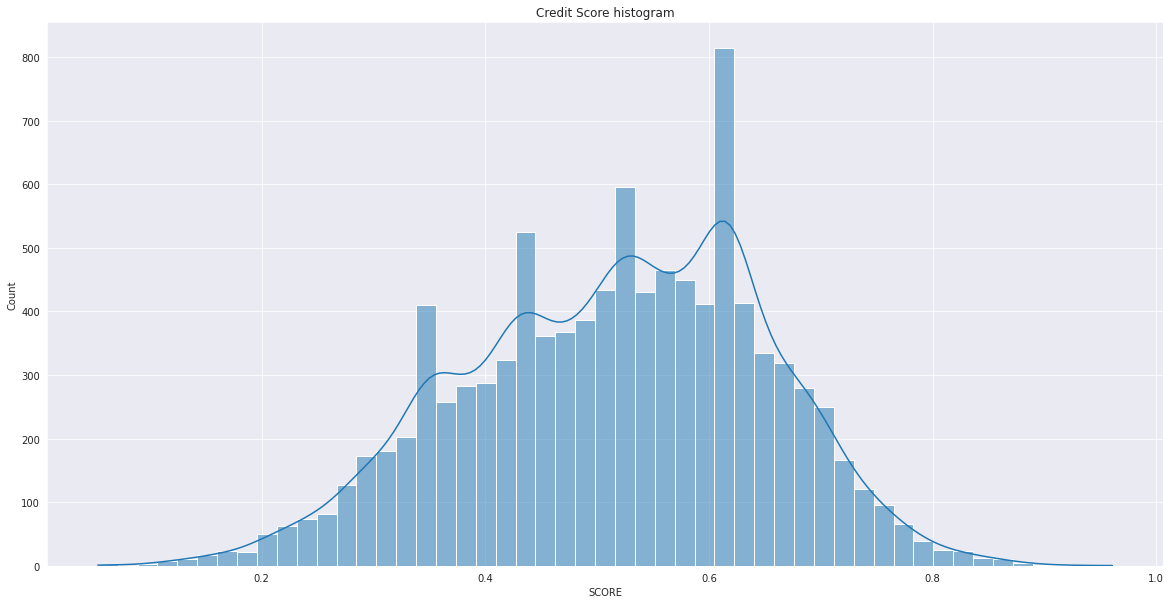

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Credit Score histogram')
sns.histplot(data=data, x='SCORE', kde=True);

Podemos chequear que la mayoria de los clientes NO tienen accidentes en su historial. Esto permitira presumir que tiene alta probabilidad nuestra base que no usara nuestro seguro, generando menos costos.

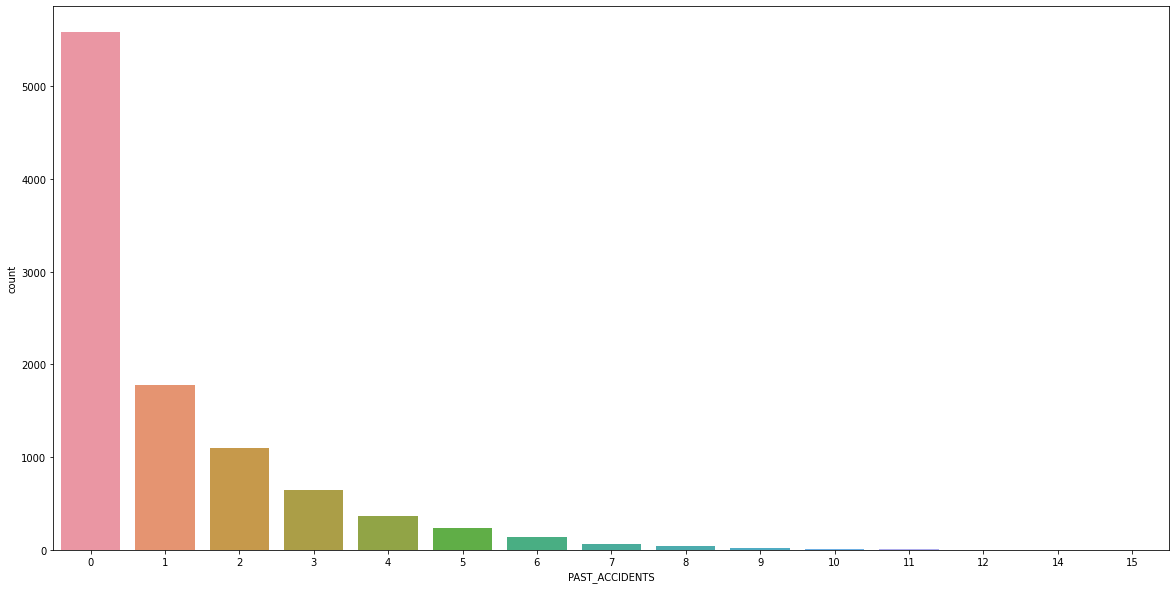

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x ='PAST_ACCIDENTS');

Comprobamos que nuestra base de aprendizaje con nuestra variable dependiente que nos permitira entrenar nuestro modelo tenemos un % equilibrado, teniendo un 68% de casos historicos que NO generaron reclamo con la compañia.

In [ ]:
df_prueba=data[['OUTCOME','ID']]
tabla = df_prueba[['OUTCOME','ID']].groupby(by=['OUTCOME']).count()
fig = px.pie(tabla, values='ID', \
             names=tabla.index)
fig.show()


Vamos a generar un grafico de dispersion para determinar la distribucion del DS con respecto a las variables Score/Accidentes pasados

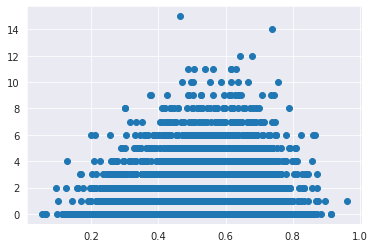

In [ ]:
fig,ax = plt.subplots()
ax.scatter(data.SCORE ,data.PAST_ACCIDENTS)

**Analisis Univariado**

Grafico por distribucion de edad, observamos que tenemos un gran % de mayores de 26 años en nuestro universo, tiene sentido ya que es una edad promedio de compra de vehiculo.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


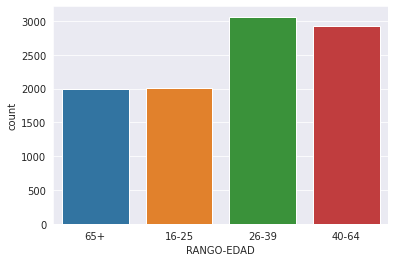

In [ ]:
sns.countplot(data['RANGO-EDAD'])

Chequeamos si hay valores atipicos en la variable SCORE. Al tener pocos, dejamos los mismos ya que no deberia desdibujar el modelo.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


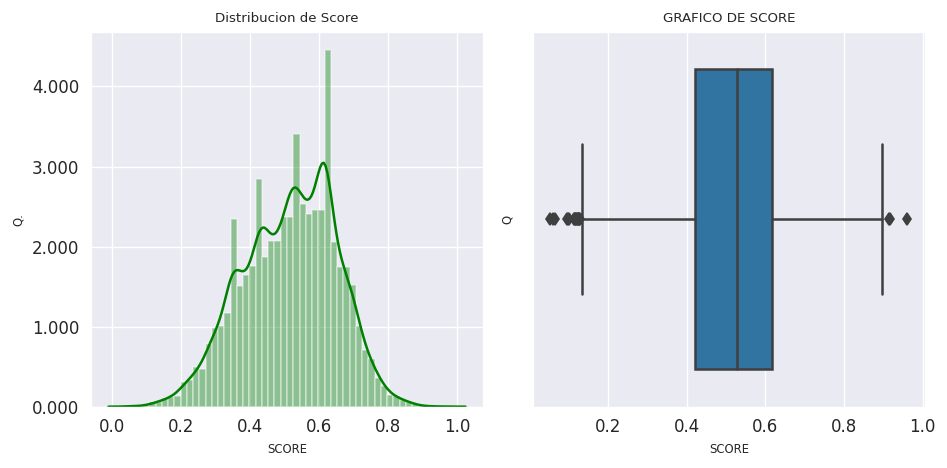

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(data[data['SCORE']!=0]['SCORE'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribucion de Score',fontdict={'fontsize':8})
axes[0].set_xlabel('SCORE',fontdict={'fontsize':7})
axes[0].set_ylabel('Q.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(data[data['SCORE']!=0]['SCORE'],ax=axes[1],orient='v')
axes[1].set_title('GRAFICO DE SCORE',fontdict={'fontsize':8})
axes[1].set_xlabel('SCORE',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Q',fontdict={'fontsize':7})
plt.tight_layout()

Distribucion de Kilometraje para determinar si al tener KM elevados, sean propensos a tener averias.

In [ ]:
frec = data["KILOMETRAJE"].value_counts()
frec_df = pd.DataFrame(frec)
frec_df.rename(columns={'KILOMETRAJE':'Q'},inplace=True)
Frec_abs_val = frec_df["Q"].values
acum = []
valor_acum = 0
for i in Frec_abs_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
frec_df["Q_acum"] = acum
frec_df["Q_%"] = round(100 * frec_df["Q"]/len(data.KILOMETRAJE),4)
Frec_rel_val = frec_df["Q_%"].values
acum = []
valor_acum = 0
for i in Frec_rel_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["Q_acum_%"] = acum
frec_df

,Q,Q_acum,Q_%,Q_acum_%
12000.0,2175,2175,21.75,21.75
11000.0,1253,3428,12.53,34.28
13000.0,1137,4565,11.37,45.65
10000.0,1071,5636,10.71,56.36
14000.0,894,6530,8.94,65.30
9000.0,856,7386,8.56,73.86
15000.0,632,8018,6.32,80.18
8000.0,557,8575,5.57,85.75
16000.0,419,8994,4.19,89.94
7000.0,322,9316,3.22,93.16


Analizaremos nuestra variable dependiente denominada "OUTCOME", que es si los clientes hay realizado un pedido a la compañia por un siniestro.Chequeamos que la variable tiene bastante nivelado sus dos valores para generar un modelo efectivo.

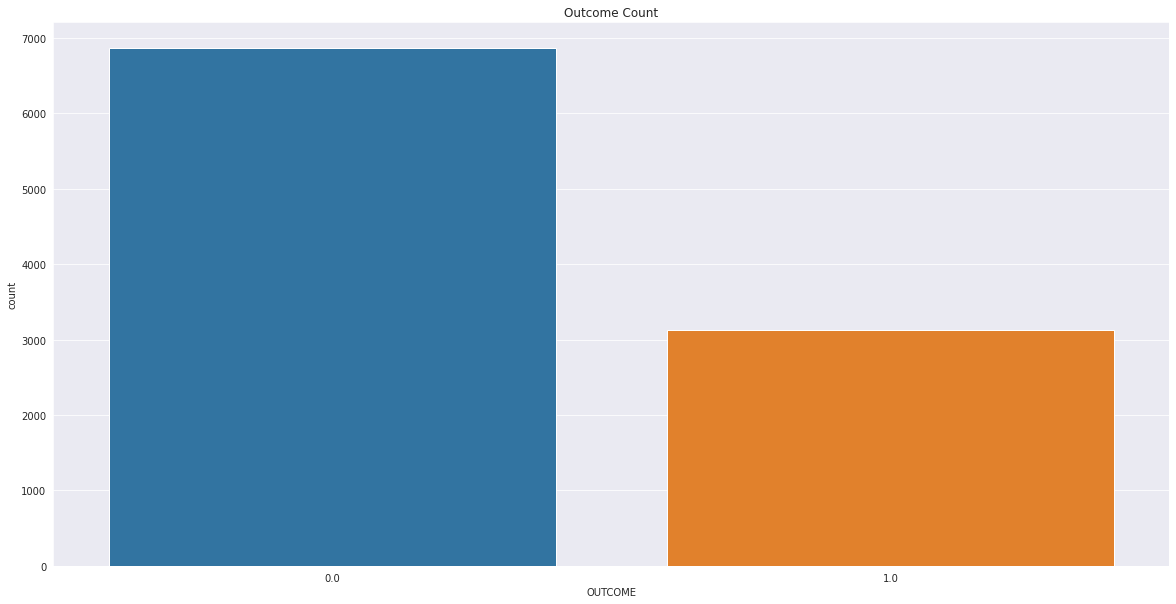

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Outcome Count')
sns.countplot(data=data, x ='OUTCOME');

***Analisis Bivariado***

Chequeamos como se distribuye nuestra variable dependiente con respecto a la edad de los clientes. Comprobamos que a menor edad, mas probabilidad de realizar un reclamo en nuestra compañia.

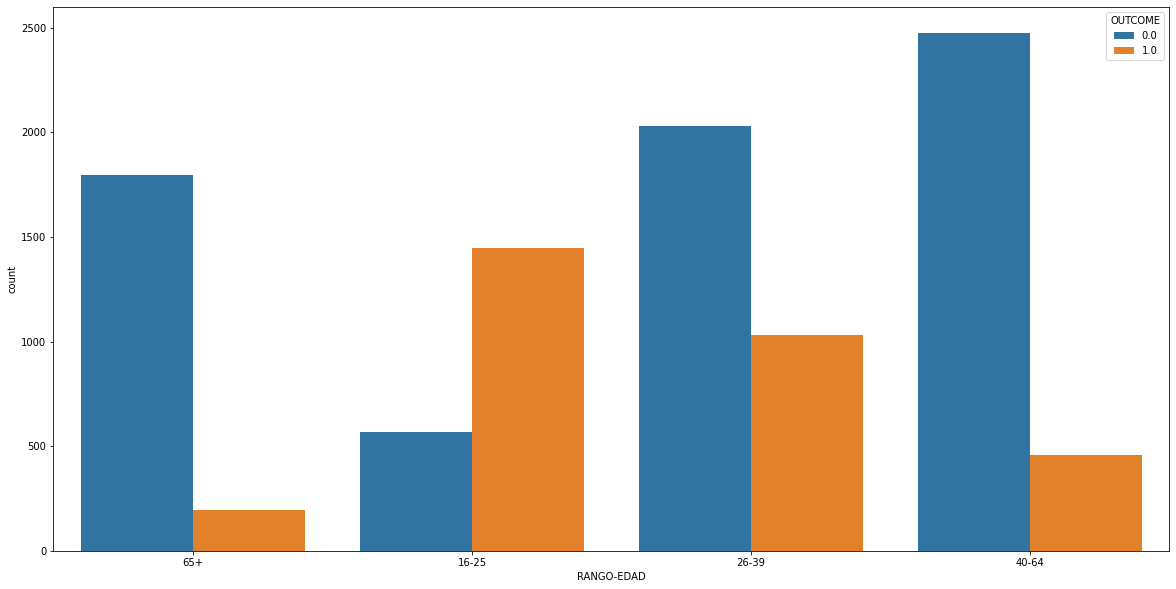

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x ='RANGO-EDAD', hue='OUTCOME');

Comprobamos que el sexo masculino es mas propenso a generar un incidente con su vehiculo.

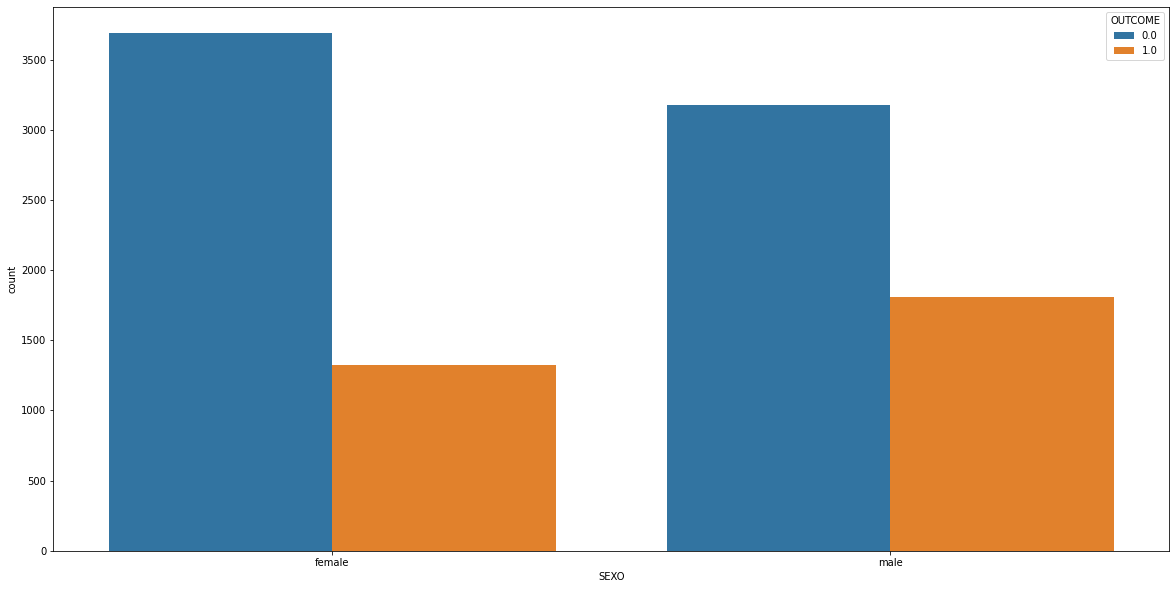

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x ='SEXO', hue='OUTCOME');

Aca tambien comprobamos que a menor experiencia en el manejo, mas probabilidad de tener un siniestro.

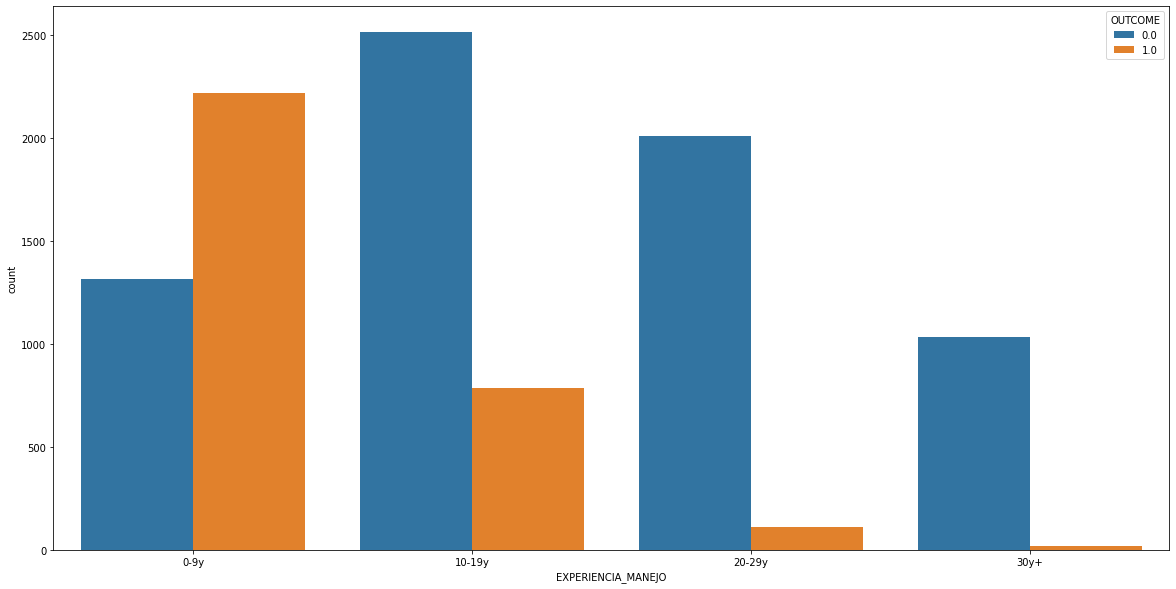

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x ='EXPERIENCIA_MANEJO', hue='OUTCOME');

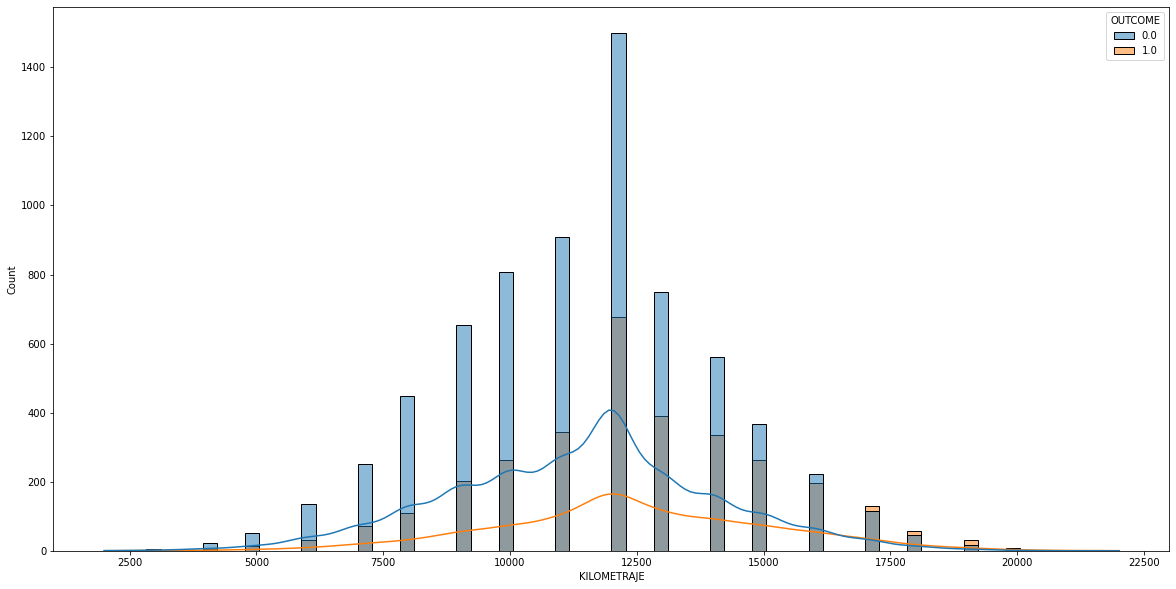

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(data=data, x='KILOMETRAJE',hue='OUTCOME', kde=True);

En este grafico demostramos que cuanto mas ingreso tiene el cliente, mas probabilidades de tener un Score alto.

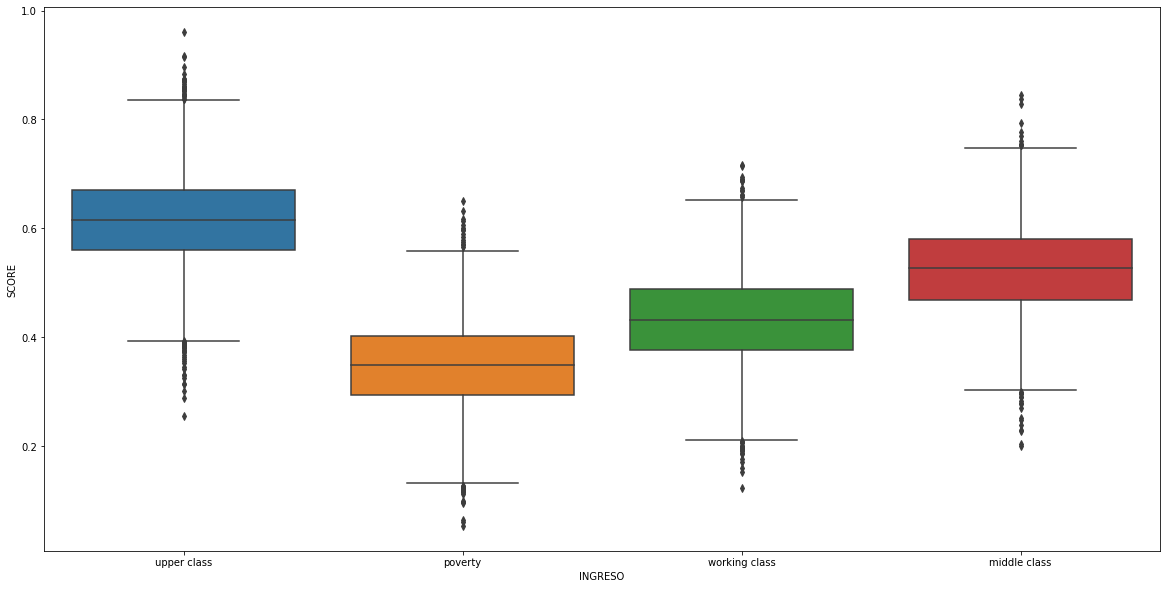

In [ ]:
plt.figure(figsize=(20,10)) 
sns.boxplot(y = 'SCORE', x = 'INGRESO', data = data)
plt.show()

**Analisis Multivariado**

Chequearemos las correlaciones entre las variables del DS

Se podria determinar con este grafico, que los autos con poco kilometraje tienen buene Score (Al ser mas nuevos y a la vez mas caros)

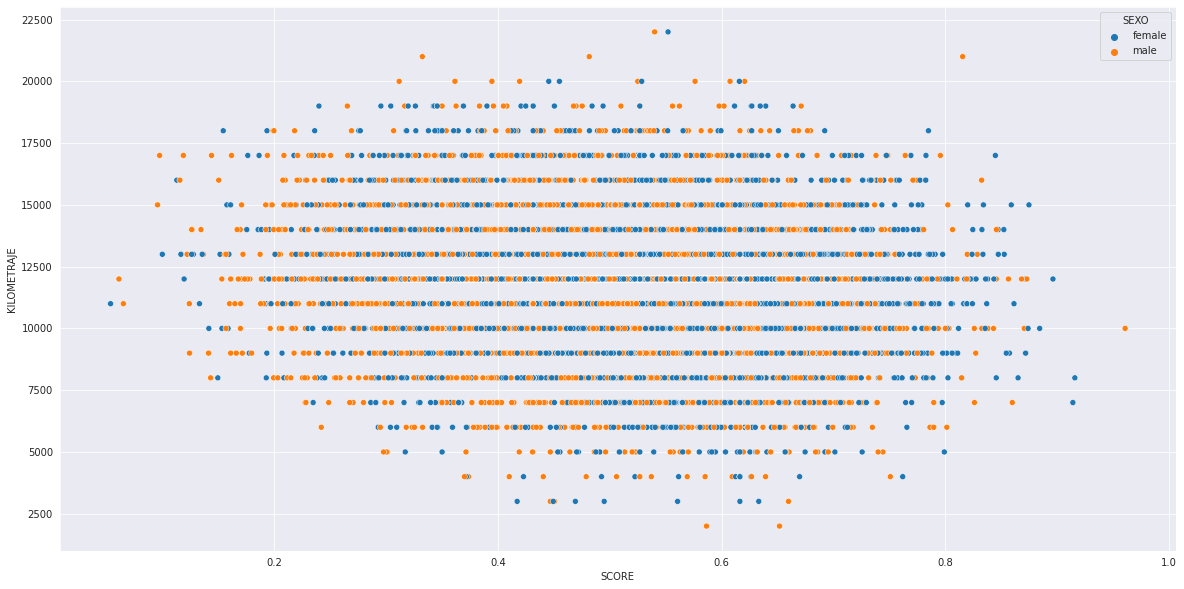

In [ ]:
plt.figure(figsize=(20,10)) 
sns.scatterplot(x='SCORE',y='KILOMETRAJE',data=data,hue='SEXO')
plt.show()

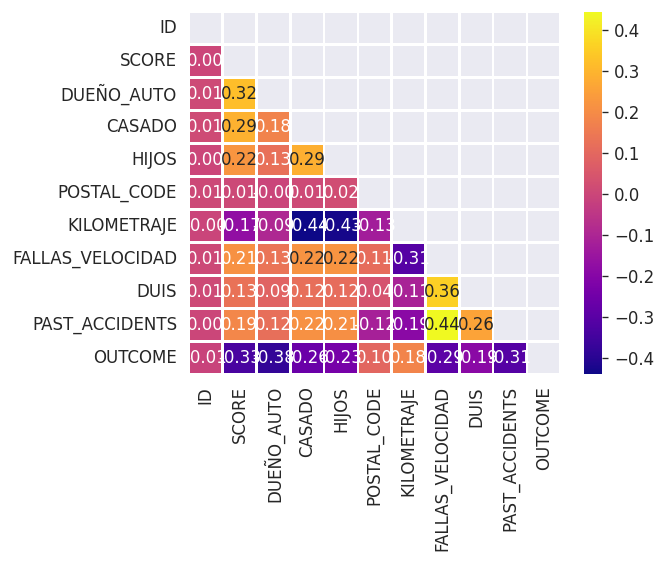

In [ ]:
#Correlaciones
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(data.corr(),dtype = bool))
sns.heatmap(data.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()

**Algoritmos de Clasificacion**

En base a lo visto en clases, elegimos algunos de los modelos que detectamos que mas nos pueden ayudar en nuestra problematica.

**Arboles de Decision**

In [ ]:
x = data.drop("OUTCOME", axis=1) #Elimino de mi dataset la variable a predecir
x.drop(['ID', 'POSTAL_CODE'], axis = 'columns', inplace=True)
x2 = pd.get_dummies(x, drop_first=True)

y = data.OUTCOME #Defino el Target
#Importamos la libreria para separar en train y test
from sklearn.model_selection import train_test_split 

#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size=0.30, random_state=42) 

In [ ]:
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo
tree = DecisionTreeClassifier(max_depth=3, random_state=42) #Creamos el modelo
x2.isnull().sum()

In [ ]:
#Entrenamos el modelo
tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

Incluimos un segundo arbol de decision pero cambiando el parametro max_depth a 5

In [ ]:
tree2 = DecisionTreeClassifier(max_depth=6, random_state=32) #Creamos el modelo
tree2.fit(X_train, y_train)
y_train_pred2 = tree2.predict(X_train) #Prediccion en Train
y_test_pred2 = tree2.predict(X_test) #Prediccion en Test


**Validacion de Modelo**

Elegimos la metrica de evaluacion de Accuracy ya que investigue que es una buena medida cuando las clases de variables de destino en los datos están casi equilibradas.
Chequeamos el primer arbol y comprobamos que tenemos un 70% de acierto cuando la variable de salida es 1 (Cliente que generaria un posible reclamo)y la salida 0, un 90% de acierto.
Teniendo en cuenta el 2 arbol mejoramos los % de acierto de la variable de salida 1, generando un mejor modelo.

In [ ]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.8265714285714286
% de aciertos sobre el set de evaluación: 0.8276666666666667


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pred=y_test_pred,y_true=y_test))

              precision    recall  f1-score   support

         0.0       0.90      0.85      0.87      2063
         1.0       0.70      0.79      0.74       937

    accuracy                           0.83      3000
   macro avg       0.80      0.82      0.81      3000
weighted avg       0.84      0.83      0.83      3000



Chequeamos el segundo arbol

In [ ]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy2 = accuracy_score(y_train, y_train_pred2)

#Calculo el accuracy en Test
test_accuracy2 = accuracy_score(y_test, y_test_pred2)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy2)
print('% de aciertos sobre el set de evaluación:',test_accuracy2)

% de aciertos sobre el set de entrenamiento: 0.837
% de aciertos sobre el set de evaluación: 0.8333333333333334


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pred=y_test_pred2,y_true=y_test))

              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88      2063
         1.0       0.76      0.67      0.72       937

    accuracy                           0.83      3000
   macro avg       0.81      0.79      0.80      3000
weighted avg       0.83      0.83      0.83      3000



**Validacion Cruzada**

In [ ]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
 
 
kf = KFold(n_splits=5)
 
clf = DecisionTreeClassifier()
 
clf.fit(X_train, y_train)
 
score = clf.score(X_train,y_train)
 
print("Metrica del modelo", score)
 
scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring="accuracy")
 
print("Metricas cross_validation", scores)
 
print("Media de cross_validation", scores.mean())
 
preds = clf.predict(X_test)
 
score_pred = metrics.accuracy_score(y_test, preds)
 
print("Metrica en Test", score_pred)

Metrica del modelo 0.9992857142857143
Metricas cross_validation [0.74142857 0.77214286 0.75       0.75642857 0.75      ]
Media de cross_validation 0.7540000000000001
Metrica en Test 0.7656666666666667


**Random Forest**



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#Separamos en X e y
X = data.drop(['OUTCOME','ID'], axis=1) #quito la variable dependiente y el ID que no utilizare para el modelo
y = data['OUTCOME'] #incluyo mi variable independiente
X = pd.get_dummies(X, drop_first=True)
data.OUTCOME.value_counts()

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

In [ ]:
(X_train, X_test,y_train, y_test) = train_test_split(X,y,stratify=y,test_size=0.30,random_state=42)
model = RandomForestClassifier(random_state=42, n_estimators=100, # n_estimators representa el numero de arboles a usar
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test) #Prediccion en Test
y_test_pred
from sklearn.metrics import accuracy_score
#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.82


**Validacion de Modelo**


Tenemos un % de acierto casi identico que el calculado en el anterior algoritmo con el arbol de decision con 100 arboles (82%).
Si achicamos a 50 arboles nos da un % de 81%.

In [ ]:
# Se incluye matriz de confusión 

from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_test_pred)

print('Matriz de Confusión de datos de Test:')

print(matriz)


In [ ]:
# Reporte de clasificación o analisis de resultados.


from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87      2060
         1.0       0.73      0.67      0.70       940

    accuracy                           0.82      3000
   macro avg       0.79      0.78      0.79      3000
weighted avg       0.82      0.82      0.82      3000



**Conclusion de ambos modelos**
No encontramos diferencias entre el modelo de Arboles de Decision y Random Forest en el DS elegido, ambos no dan % elevados de acierto con la variable de salida 1 (Si utilizaran el seguro contratado).

**Metodo de Ensamble**

Utilizamos el algoritmo "XG Boost" para implementar optimizacion en nuestro modelo, dando como resultado un % mayor de eficacia pero sigue muy bajo la prediccion de la variable de salida 1 (SI usara el seguro contratado). 

In [ ]:
!pip install xgboost
import xgboost as xgb #pip install xgboost
from sklearn.linear_model import LinearRegression as LR
X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size = 0.3, random_state=123)
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=15,seed=42,max_depth=5, learning_rate=0.01)
clf_xgb.fit(X_train,y_train) #Entrenamos el modelo
y_test_pred = clf_xgb.predict(X_test) #Prediccion en Test
#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

#print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
% de aciertos sobre el set de evaluación: 0.8303333333333334


In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.85      0.87      2046
         1.0       0.71      0.79      0.75       954

    accuracy                           0.83      3000
   macro avg       0.80      0.82      0.81      3000
weighted avg       0.84      0.83      0.83      3000



**Metodos de Hiperparametro**

Utilizamos el metodo "Halving Grid Search CV" para implementar optimizacion en nuestro modelo, dando como resultado un % mayor de eficacia.

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV
params_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [5,6,7],
        'criterion':['entropy','gini']
        }
model= xgb.XGBClassifier(learning_rate=0.001)


In [ ]:
halving_cv = HalvingGridSearchCV(model, params_grid, scoring="accuracy", factor=3)
halving_cv.fit(X_train, y_train)
print("Mejores parametros", halving_cv.best_params_)
print("Mejor Score CV", halving_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, halving_cv.predict(X_test)), 5)}')

Mejores parametros {'colsample_bytree': 0.8, 'criterion': 'entropy', 'gamma': 1.5, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.8}
Mejor Score CV 0.8372427983539094
Accuracy del modelo = 0.84133
